## Grafica de Histograma

In [1]:
library(ggplot2)
library(dplyr)
library(patchwork) #Esta biblioteca es necesaria para crear los hisogramas




Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




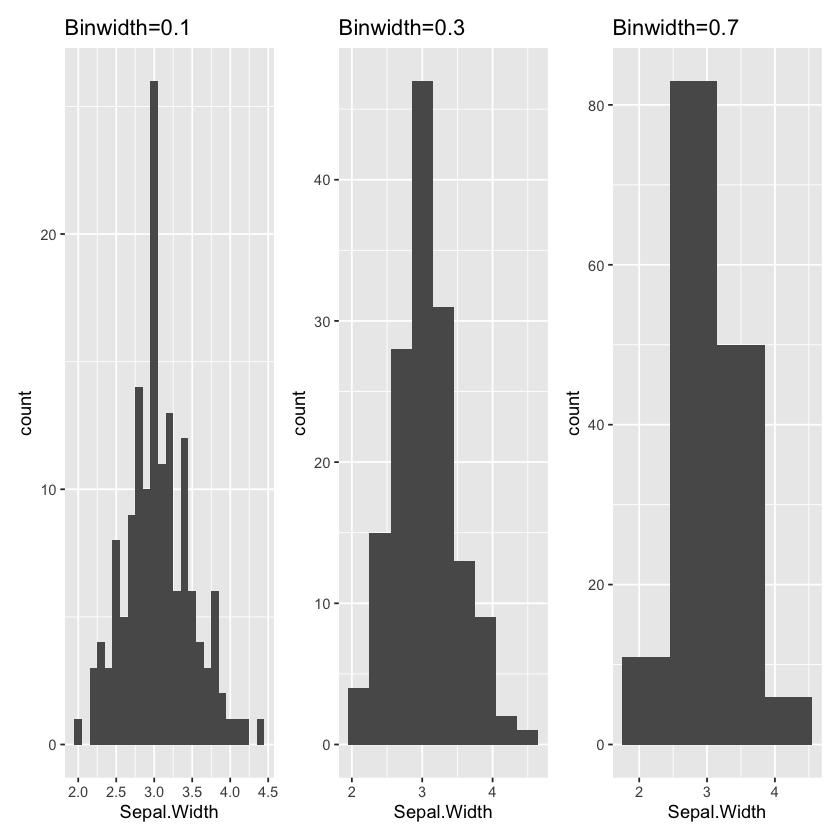

In [2]:
miGraf1 <- ggplot(iris, aes(Sepal.Width)) +
    geom_histogram(binwidth = 0.1) + #* Se utiliza el parametro geom_histogram
    ggtitle("Binwidth=0.1")

miGraf2 <- ggplot(iris, aes(Sepal.Width)) +
    geom_histogram(binwidth = 0.3) +
    ggtitle("Binwidth=0.3")

miGraf3 <- ggplot(iris, aes(Sepal.Width)) +
    geom_histogram(binwidth = 0.7) +
    ggtitle("Binwidth=0.7")

miGraf1 + miGraf2 + miGraf3

# Grafica de densidad

Graficando grafica de densidad con un histograma

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(density)` instead."


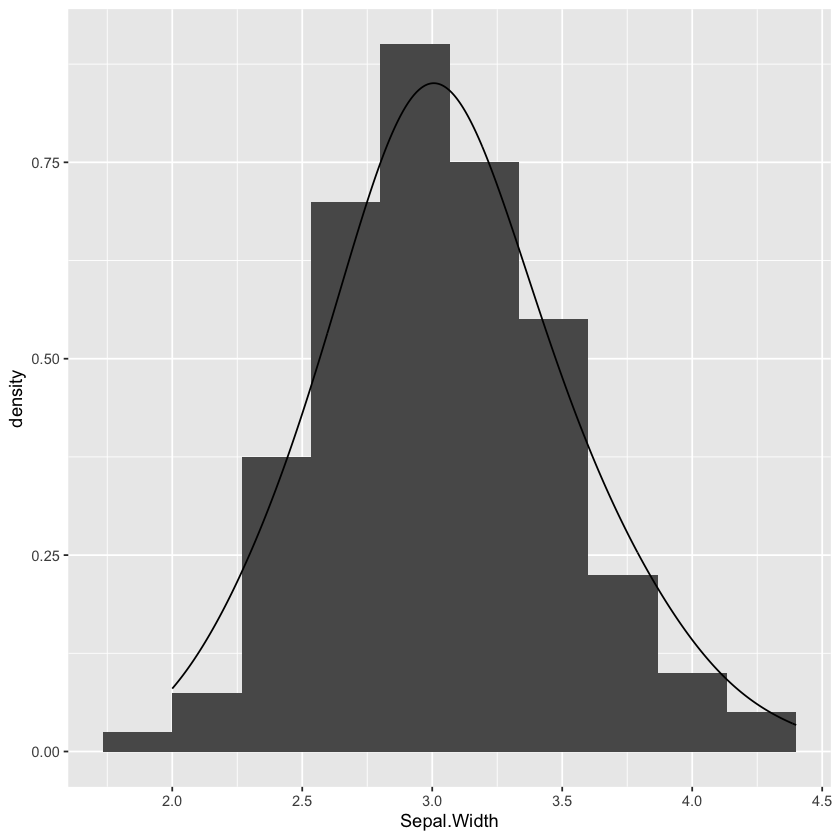

In [4]:
## Observa que podemos solicitar que calcule densidad en vez de conteo
ggplot(iris, aes(x = Sepal.Width)) +
    geom_histogram(aes(y = ..density..), bins = 10) + #* Se utiliza el parametro ..density..
    geom_density(adjust = 2) #* Usas el parametro geom_density
# geom_density(adjust=2,kernel='rectangular')


Grafica de densidad unicamente

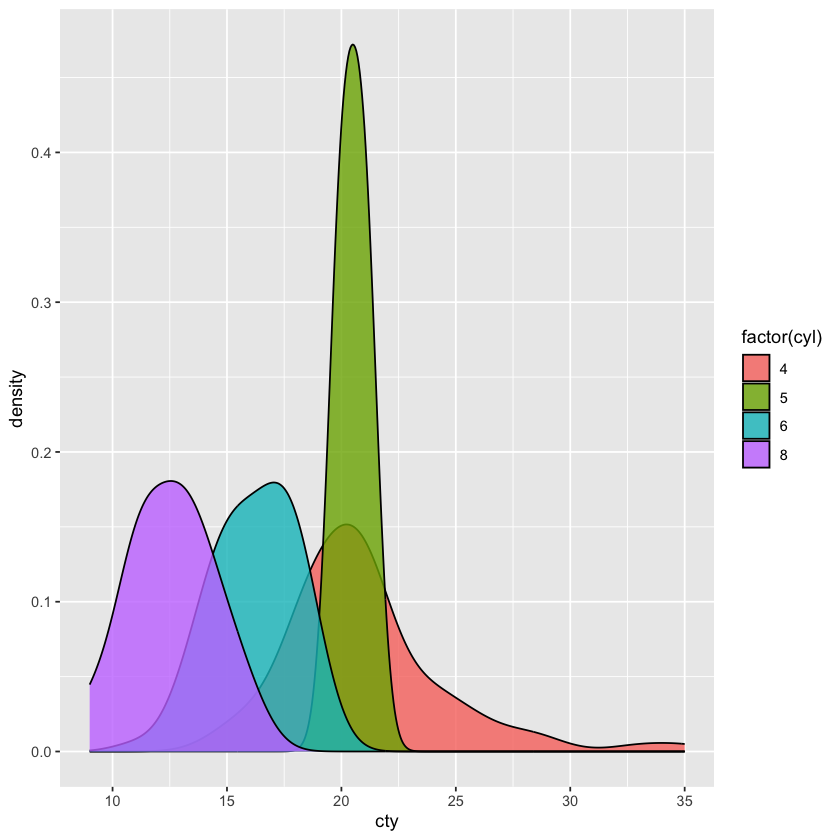

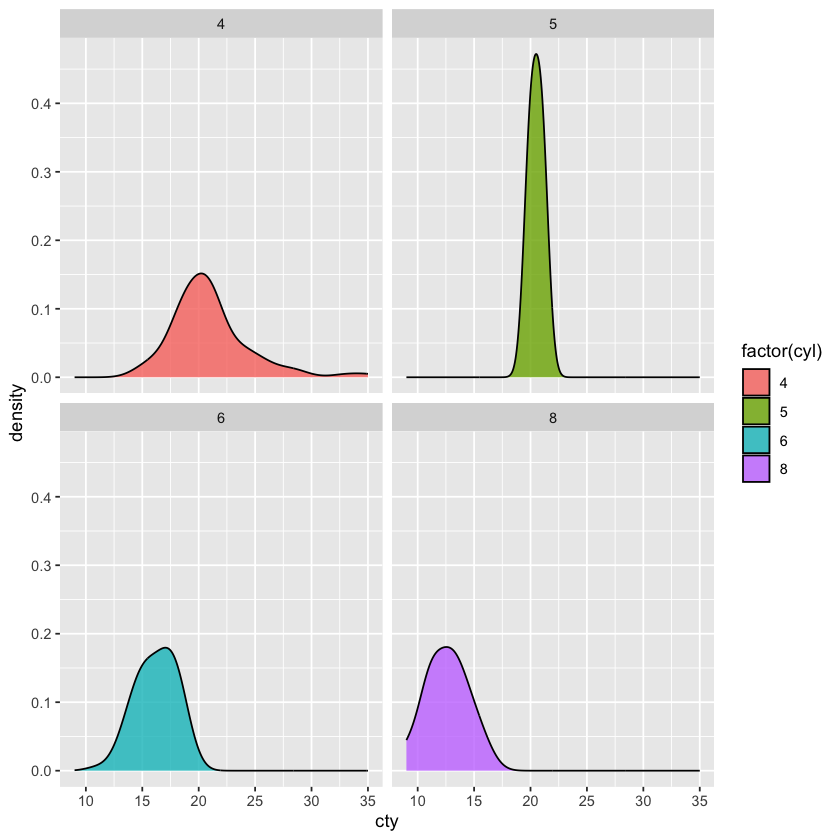

In [5]:
miGraf <- ggplot(mpg, aes(cty, group = cyl, fill = factor(cyl)))
miGraf <- miGraf + geom_density(alpha = 0.8, adjust = 1.5)

miGraf #Asi mostramos todas las graficas en un espacio

miGraf + facet_wrap(~cyl) #De esta manera podemos concatenar 


# Graficas de caja

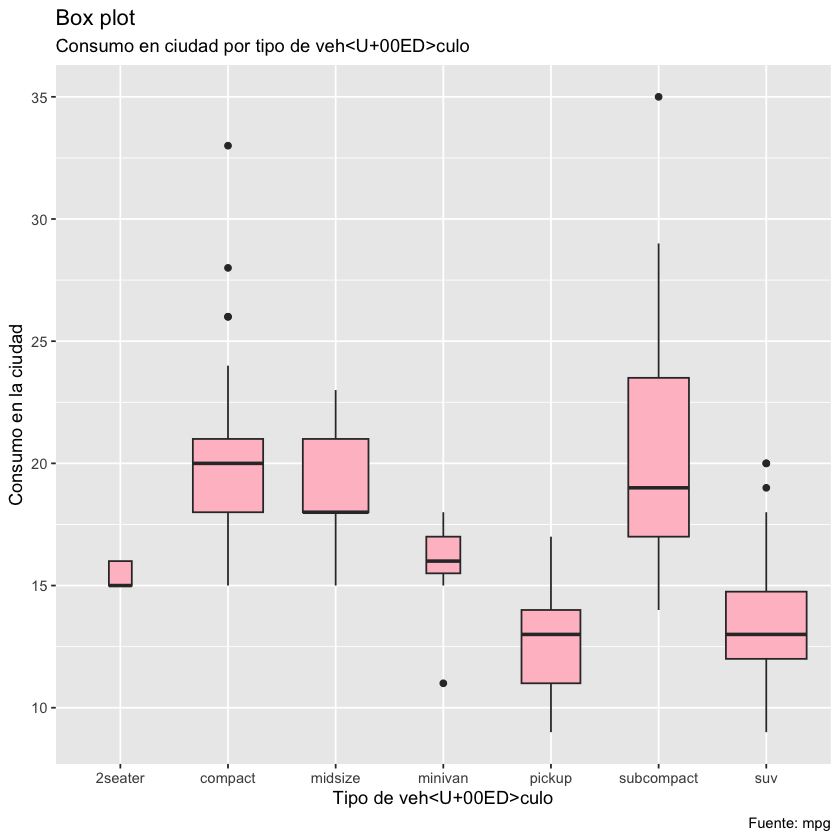

In [6]:
miGraf <- ggplot(mpg, aes(class, cty))
p1 <- miGraf + geom_boxplot(varwidth = T, fill = "pink") +
    labs(
        title = "Box plot",
        subtitle = "Consumo en ciudad por tipo de vehículo",
        caption = "Fuente: mpg",
        x = "Tipo de vehículo",
        y = "Consumo en la ciudad"
    )
p1


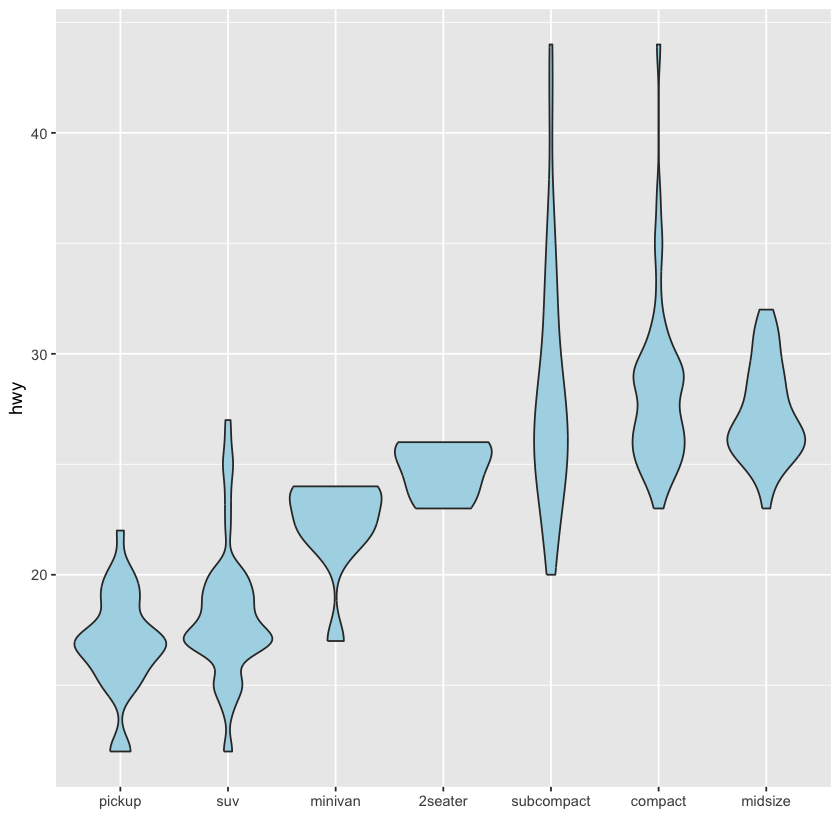

In [9]:
# reorder reordena la variable class en función de la
# mediana de consumo en carretera
mpg$class <- with(mpg, reorder(class, hwy, median))

p <- mpg %>%
    ggplot(aes(x = class, y = hwy)) +
    geom_violin(fill = "lightblue") + #!La gran diferencia entre una de caja y violin es geom_violin y geom_boxplot
    xlab("class") +
    theme(legend.position = "none") +
    xlab("")
p

## Graficas con ejes radiales

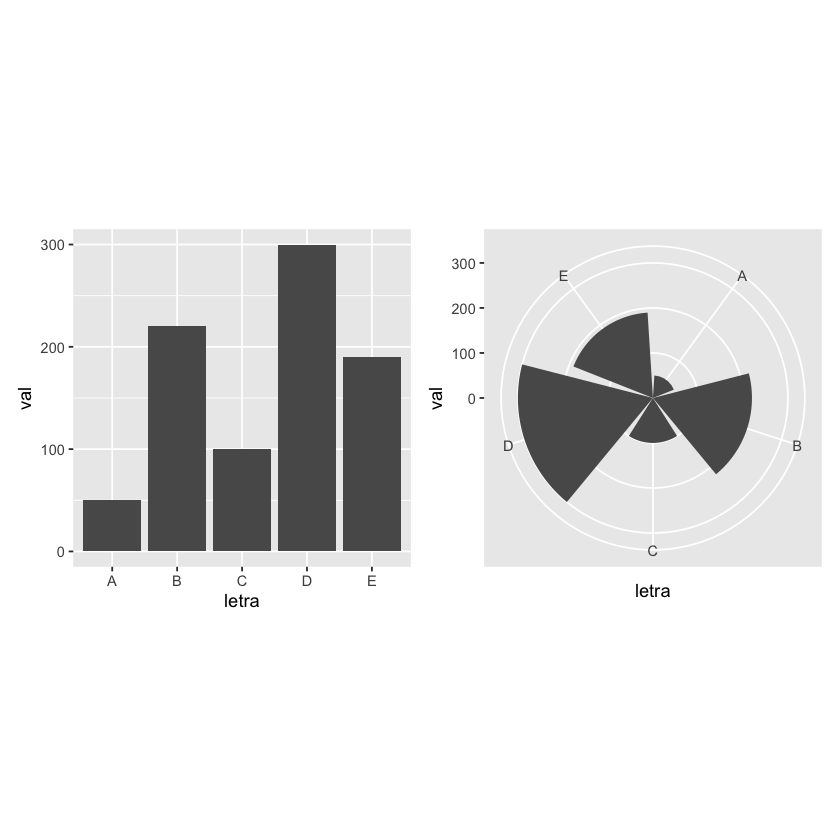

In [14]:
data <- data.frame(letra = LETTERS[1:5], val = c(50, 220, 100, 300, 190))
p1 <- ggplot(data, aes(letra, val)) +
    geom_bar(stat = "identity")

p2 <- ggplot(data, aes(letra, val)) +
    geom_bar(stat = "identity") +
    coord_polar()

p1 + p2

# Graficas de pastel

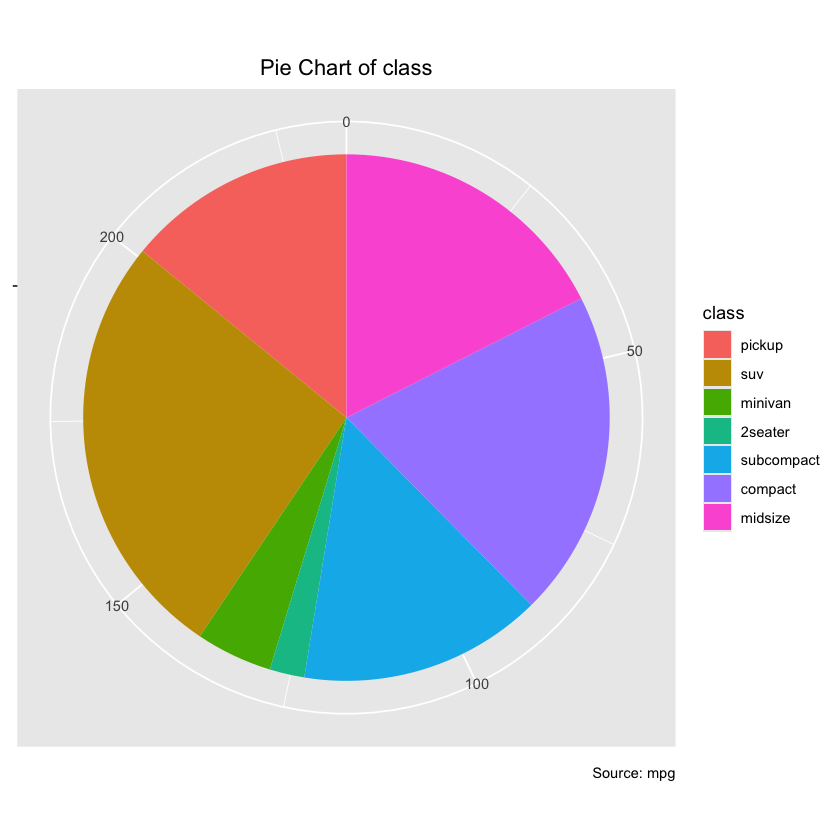

In [15]:
pie <- ggplot(mpg, aes(x = "", fill = factor(class))) + # Solo se pone como parametro el de las clases
    geom_bar(width = 1) +
    theme(
        axis.line = element_blank(),
        plot.title = element_text(hjust = 0.5)
    ) +
    labs(
        fill = "class",
        x = NULL,
        y = NULL,
        title = "Pie Chart of class",
        caption = "Source: mpg"
    )
pie + coord_polar(theta = "y", start = 0) #! Con las coordenas se indica que sea de pastel


# Barras apiladas normalizadas

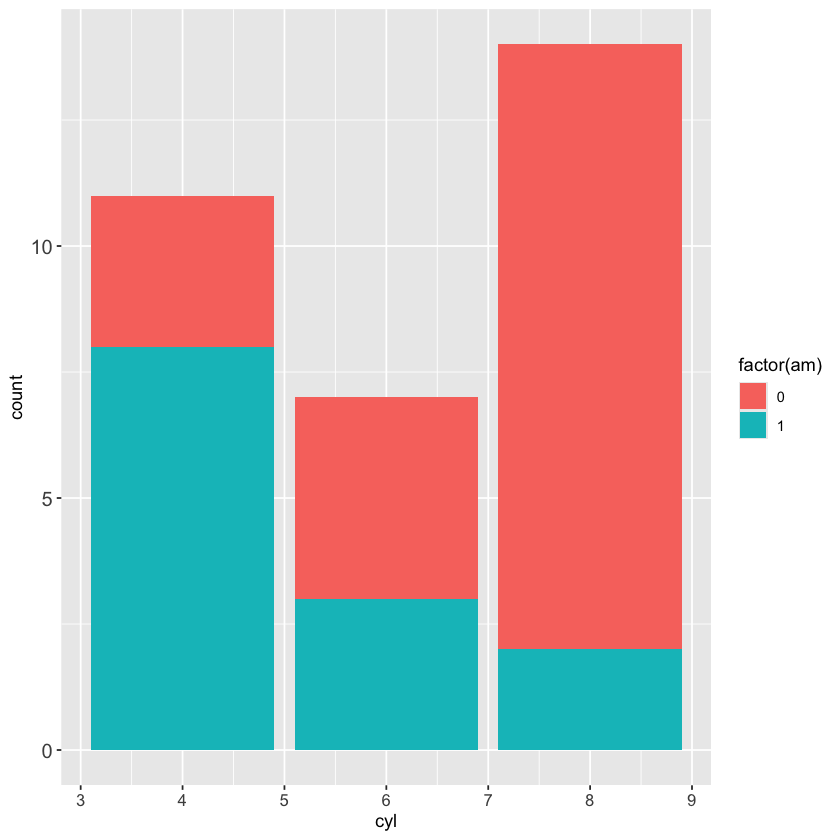

In [16]:
# Recordatorio: Gráfica de barras apiladas
g <- ggplot(mtcars, aes(x = cyl, fill = factor(am))) +
    theme(
        axis.text.y = element_text(size = 12),
        axis.text.x = element_text(size = 10)
    )
g + geom_bar()
# g + geom_bar(position='stack')


## Barras agrupadas

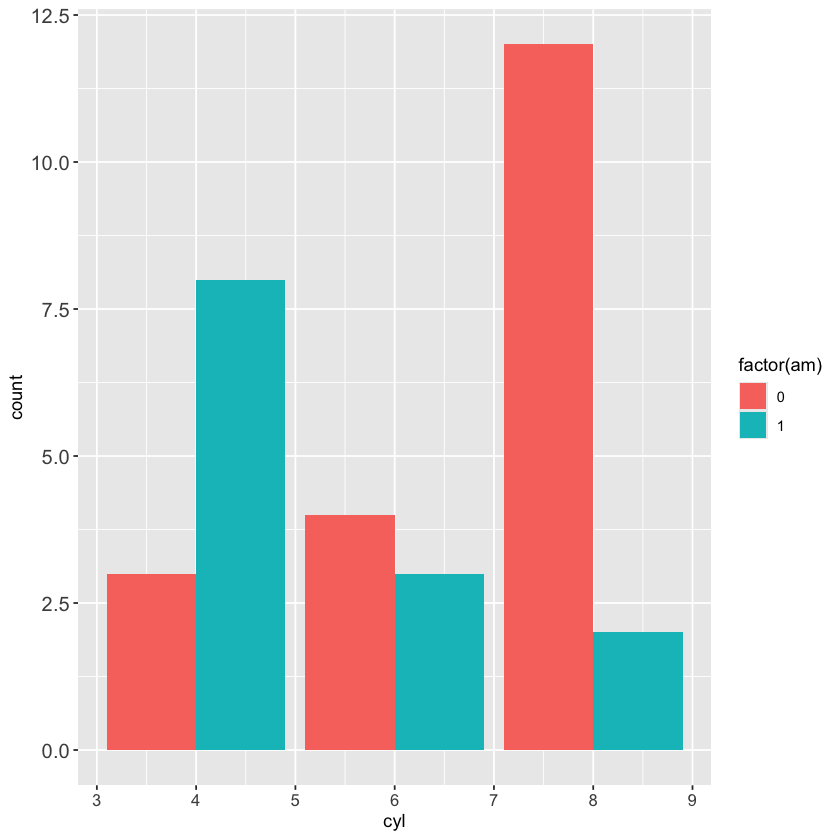

In [17]:
g + geom_bar(position = "dodge")


Graficas al 100%

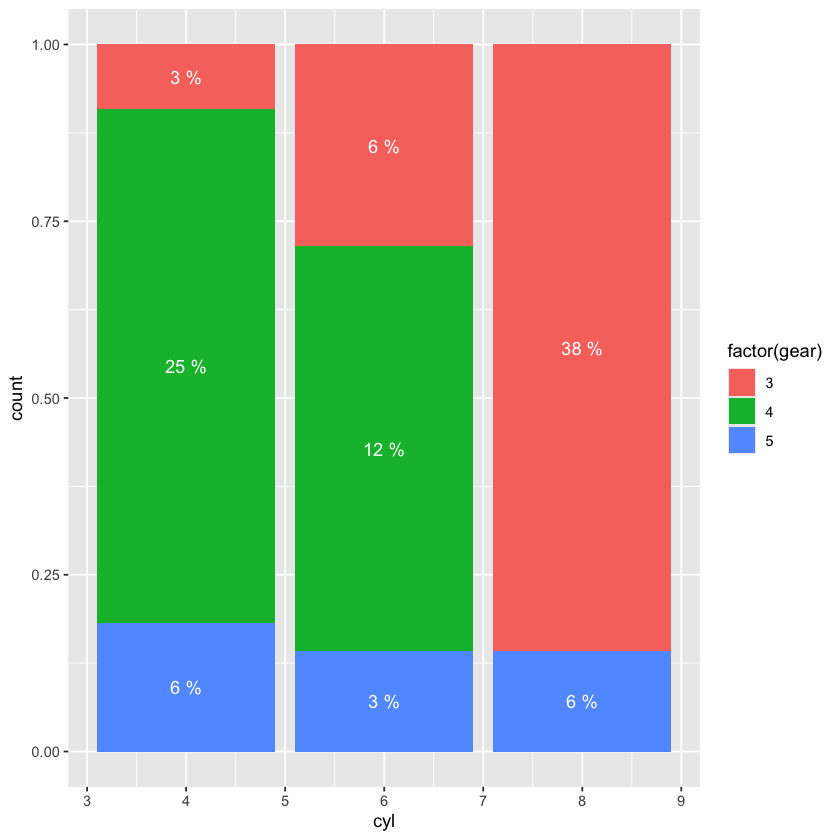

In [18]:
# Propocion de cada elemento a la totalidad de dataset
ggplot(mtcars, aes(x = cyl, fill = factor(gear))) +
    geom_bar(position = "fill") +
    stat_count(
        geom = "text",
        aes(label = paste(round((..count..) / sum(..count..) * 100), "%")),
        position = position_fill(vjust = 0.5), colour = "white"
    )

Con proporciones

`summarise()` has grouped output by 'cyl'. You can override using the `.groups`
argument.


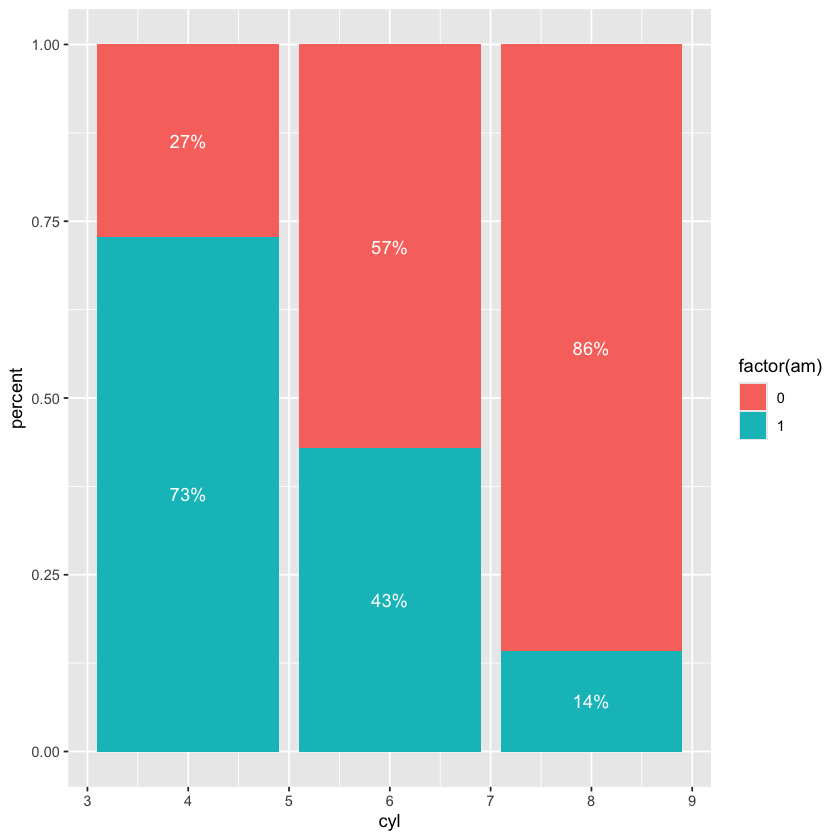

In [19]:
# Propocion de cada elemento a la totalidad de la columna
# Calcula los porcentajes
mtcars_summary <- mtcars %>%
    group_by(cyl, am) %>%
    summarise(count = n()) %>%
    mutate(percent = count / sum(count) * 100)

# Crea el gráfico de barras apiladas al 100% con porcentajes
ggplot(mtcars_summary, aes(x = cyl, y = percent, fill = factor(am))) +
    geom_bar(stat = "identity", position = "fill") +
    geom_text(aes(label = paste0(round(percent), "%")),
        position = position_fill(vjust = 0.5), color = "white"
    )
